# **Índice Global de la Inteligencia Artificial en 2023**
Este notebook contiene el análisis exploratorio de datos del estado de la los 62 países más preparados del mundo en inteligencia artifical. Para ello analizaremos por cada país el **"talento"** que estos aglutinan en IA, las **"infraestructuras"** para procesar toda la computación requerida, el **"entorno operativo"**, la relevancia de la **"investigación"** de la IA, el nivel de **"desarrollo"** de inteligencia artificial, así como la grado de **"estrategia guvernamental"** y **"comercial"** de cada uno de estos 62 países.

- Las 7 campos comentados previamente se clasifican en 3 categorías:

    1. **Implementación:**
        - 'Talent'
        - 'Infraestrucuture'
        - 'Operating Environment'
    2. **Innovación:**
        - 'Research'
        - 'Development'
    3. **Inversión:**
        - 'Government Strategy'
        - 'Comercial'


fuente informativa 1 = https://intersog.com/blog/ai-dominant-players-and-aspiring-challengers/

fuente informativa 2 = https://www.tortoisemedia.com/intelligence/global-ai/

fuente del dataset = https://www.kaggle.com/datasets/katerynameleshenko/ai-index



---
---
---

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from soccerplots.radar_chart import Radar

import warnings

# Suprime todas las advertencias
warnings.filterwarnings("ignore")

In [7]:
ai_index_db = "../data/AI_index_db.csv"

In [8]:
df_ai_index_db = pd.read_csv(ai_index_db, encoding="ISO-8859-1")
print(f"Filas y columnas del data frame: {df_ai_index_db.shape}", "\n")
print(f"Tamaño del data frame: {df_ai_index_db.size}\n")
print("Data frame:")
df_ai_index_db.head()

Filas y columnas del data frame: (62, 13) 

Tamaño del data frame: 806

Data frame:


,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy


In [9]:
df_ai_index_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                62 non-null     object 
 1   Talent                 62 non-null     float64
 2   Infrastructure         62 non-null     float64
 3   Operating Environment  62 non-null     float64
 4   Research               62 non-null     float64
 5   Development            62 non-null     float64
 6   Government Strategy    62 non-null     float64
 7   Commercial             62 non-null     float64
 8   Total score            62 non-null     float64
 9   Region                 62 non-null     object 
 10  Cluster                62 non-null     object 
 11  Income group           62 non-null     object 
 12  Political regime       62 non-null     object 
dtypes: float64(8), object(5)
memory usage: 6.4+ KB


In [10]:
df_ai_index_db.describe()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,16.803065,63.503710,66.925484,16.610000,14.824677,57.865645,6.171935,23.914677
std,15.214963,20.217525,20.000424,17.413996,19.419279,26.252448,14.029632,15.123586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.365000,55.857500,58.107500,3.032500,1.202500,41.030000,0.697500,14.805000
50%,13.445000,65.230000,69.505000,12.930000,9.005000,63.930000,2.585000,23.220000
75%,24.567500,75.947500,80.500000,25.412500,19.980000,77.952500,5.307500,30.487500
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


>

### EEUU y China son las dos potencias más importantes en inteligencia artificial. Pero vamos a ver quién la más importante. Para ello vamos crear un nuevo data frame que contenga las dos muestras respecto a estos dos países que contiene nuestro data frame principal.

In [11]:
# Creamos un nuevo data frame para observar los valores de EEUU y China
df_compare = df_ai_index_db[(df_ai_index_db['Country'] == 'United States of America') | (df_ai_index_db['Country'] == 'China')].reset_index()

In [12]:
df_compare

,index,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy


Nos desacemos de las columnas que no nos sirven.

In [13]:
# "Dropeamos" las columnas no necesarias
df_compare = df_compare.drop(['index', 'Region', 'Cluster', 'Income group', 'Political regime'], axis=1)

Vamos a crear un gráfico de radar para comparar los distintos atributos de cada país

In [14]:
# Obtenemos los parametros (atributos = columnas) numéricas
parametros = list(df_compare.columns)
parametros = parametros[1:] # Dejamos la primera columna ('Country' tipo object) fuera mediante slicing
parametros

['Talent',
 'Infrastructure',
 'Operating Environment',
 'Research',
 'Development',
 'Government Strategy',
 'Commercial',
 'Total score']

In [15]:
# Creamos listas para añadir los rangos y los valores
rangos = []
a_values = [] 
b_values = []

for i in parametros:
    a = min(df_compare[parametros][i])
    a = a - (a*.25)

    b = max(df_compare[parametros][i])
    b = b + (b*.25)

    rangos.append((a,b))

for i in range(len(df_compare['Country'])):
    if df_compare['Country'][i] == 'United States of America':
        a_values = df_compare.iloc[i].values.tolist()
    if df_compare['Country'][i] == 'China':
        b_values = df_compare.iloc[i].values.tolist()

a_values = a_values[1:]
b_values = b_values[1:]

country_values = [a_values, b_values]

In [16]:
rangos

[(12.3825, 125.0),
 (70.515, 125.0),
 (48.42, 114.46249999999999),
 (53.565, 125.0),
 (59.9775, 125.0),
 (58.042500000000004, 118.5875),
 (33.015, 125.0),
 (47.19, 125.0)]

In [17]:
country_values

[[100.0, 94.02, 64.56, 100.0, 100.0, 77.39, 100.0, 100.0],
 [16.51, 100.0, 91.57, 71.42, 79.97, 94.87, 44.02, 62.92]]

In [18]:
# Títutlo del gráfico
title = dict(
    title_name = 'Estados Unidos',
    title_color = 'blue',
    subtitle_name = 'Potencia IA',
    subtitle_color = 'blue',
    title_name_2 = 'China',
    title_color_2 = 'red',
    subtitle_name_2 = 'Potencia IA',
    subtitle_color_2 = 'red',
    title_fontsize = 18,
    subtitle_fontsize = 15
) 

endnote = '@egoitz aulestia\ndata via AI Global Idex'

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


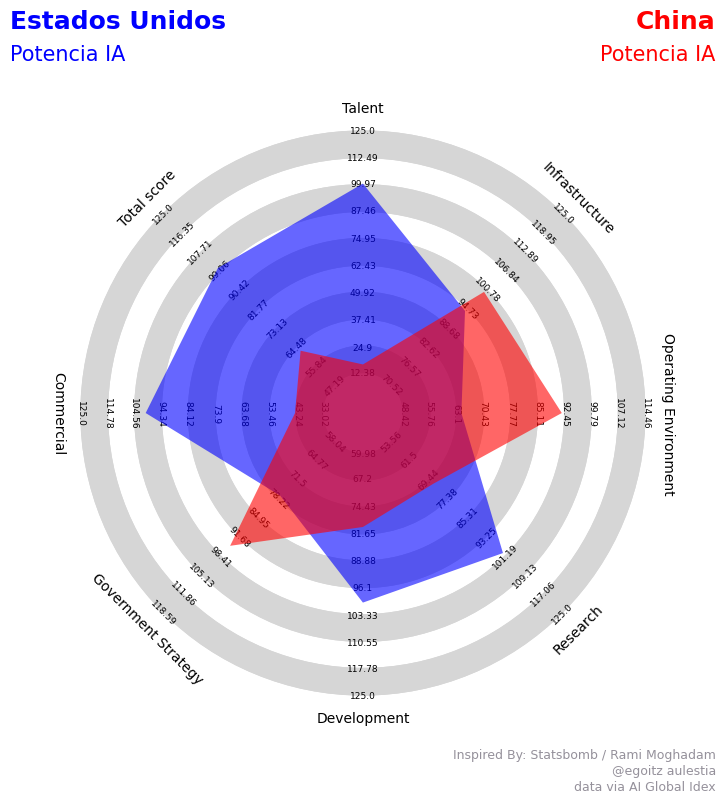

In [19]:
radar = Radar()

fig,ax = radar.plot_radar(ranges=rangos, params=parametros, values=country_values,
                          radar_color=['blue', 'red'],
                          alpha=[.6, .75], title=title, endnote=endnote,
                          compare=True)

#### Estados Unidos sale victorioso en esta lucha de ser la potencia mundial en IA, con unos resultados muy distanciados en Talento, Investigación, Desarrollo y en Comercio en IA. Por su parte, China tiene mejo Infraestructura, Entorno Operativo y Estrategia Guvernamental. Pero queda demostrado en la Puntuación Total, que EEUU esta muy por encima de China

In [20]:
df_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                2 non-null      object 
 1   Talent                 2 non-null      float64
 2   Infrastructure         2 non-null      float64
 3   Operating Environment  2 non-null      float64
 4   Research               2 non-null      float64
 5   Development            2 non-null      float64
 6   Government Strategy    2 non-null      float64
 7   Commercial             2 non-null      float64
 8   Total score            2 non-null      float64
dtypes: float64(8), object(1)
memory usage: 272.0+ bytes


### Vamos a crear un nuevo gráfico de radar pero esta vez con Plotly y que nos visualice a los 62 países de data frame

In [21]:
# Creamos un nuevo data frame
df_radar = df_ai_index_db

# Eliminamos columans innecesarias
df_radar = df_radar.drop(['Region', 'Cluster', 'Income group', 'Political regime'], axis=1)

#Imprimimos df
df_radar.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89


Para crear el radar chart de Plotly necesitamos modificar las columans y filas nuestro data frame

In [22]:
# Inicializamos lista vacía para los datos reorganizados
data_reordered = []

# Iteramos a través de los países y atributos para reorganizar los datos
for _, row in df_radar.iterrows():
    country = row['Country']
    attributes = df_radar.columns[1:]
    for attr, score in zip(attributes, row[1:]):
        data_reordered.append([country, attr, score])

# Creamos el DataFrame reorganizado
df_radar_reordered = pd.DataFrame(data_reordered, columns=['Country', 'Attributes', 'Score'])

# Mostramos el nuevo DataFrame reorganizado
print(df_radar_reordered)

                      Country             Attributes   Score
0    United States of America                 Talent  100.00
1    United States of America         Infrastructure   94.02
2    United States of America  Operating Environment   64.56
3    United States of America               Research  100.00
4    United States of America            Development  100.00
..                        ...                    ...     ...
491                  Pakistan               Research    2.17
492                  Pakistan            Development    1.09
493                  Pakistan    Government Strategy   13.92
494                  Pakistan             Commercial    0.27
495                  Pakistan            Total score    0.00

[496 rows x 3 columns]


In [23]:
# Radar Chart con lineas cerradas
fig = px.line_polar(df_radar_reordered, r='Score', theta='Attributes', color='Country', line_close=True)

fig.update_layout(
    title={
        'text': "Índice Global de la Inteligencia Artificial",
        'x': 0.44,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    height=600, 
    width=1200,
)

fig.show()

In [24]:
# Radar Chart con lineas cerradas
fig = px.line_polar(df_radar_reordered, r='Score', theta='Attributes', color='Country', line_close=True)

fig.update_layout(
    title={
        'text': "Índice Global de la Inteligencia Artificial",
        'x': 0.44,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    height=600, 
    width=1200,
)

fig.show()

In [25]:
fig = px.line_polar(df_radar_reordered, r='Score', theta='Attributes', color='Country', line_close=True)

fig.update_traces(fill='toself')

fig.update_layout(
    title={
        'text': "Índice Global de la Inteligencia Artificial",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    height=600,  # Altura en píxeles
    width=1200,   # Ancho en píxeles
)

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[0, 101]  # Ajusta el rango del eje radial aquí
        )
    )
)

fig.show()

In [26]:
fig = px.line_polar(df_radar_reordered, r='Score', theta='Attributes', color='Country', line_close=True)

fig.update_traces(fill='toself')

fig.update_layout(
    title={
        'text': "Índice Global de la Inteligencia Artificial",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    height=600,  # Altura en píxeles
    width=1200,   # Ancho en píxeles
)

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[0, 101]  # Ajusta el rango del eje radial aquí
        )
    )
)

fig.show()

In [27]:
fig = px.line_polar(df_radar_reordered, r='Score', theta='Attributes', color='Country', line_close=True, line_shape='spline')

fig.update_traces(fill='toself')

fig.update_layout(
    title={
        'text': "Índice Global de la Inteligencia Artificial",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_layout(
    height=600,  
    width=1200,   
)

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[0, 102]  # Ajusta el rango del eje radial aquí
        )
    )
)

fig.show()

In [28]:
fig = px.line_polar(df_radar_reordered, r='Score', theta='Attributes', color='Country', line_close=True, line_shape='spline')

fig.update_traces(fill='toself')

fig.update_layout(
    title={
        'text': "Índice Global de la Inteligencia Artificial",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_layout(
    height=600,  
    width=1200,   
)

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[0, 102]  # Ajusta el rango del eje radial aquí
        )
    )
)

fig.show()

In [29]:
fig = px.line_polar(df_radar_reordered, r='Score', theta='Attributes', color='Country', line_close=True, line_shape='spline')

fig.update_traces(fill='toself')

fig.update_layout(
    title={
        'text': "Índice Global de la Inteligencia Artificial",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_layout(
    height=600,  
    width=1200,   
)

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[0, 102]  # Ajusta el rango del eje radial aquí
        )
    )
)

fig.show()

### Vamos crear un heatmap con plotly para mostrar los datos numéricos del data frame

In [30]:
# Creamos un nuevo data frame para el heatmap
df_hm = df_ai_index_db.drop(columns=['Country', 'Region', 'Cluster', 'Income group', 'Political regime'])

In [31]:
fig = px.imshow(df_hm, text_auto=True, aspect="auto")
# Set the height of the heatmap
fig.update_layout(height=800)  # You can adjust the height to your preferred value
fig.update_layout(
    title={
        'text': "Mapa de Calor Índice Global de la Inteligencia Artificial",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [32]:
import pandas as pd
import plotly.express as px

# Assuming you have loaded your data frame 'df_ai_index_db'
# Set the 'Country' column as the index
# df_ai_index_db.set_index('Country', inplace=True)

# Now, create the heatmap using Plotly with a larger plot size
fig = px.imshow(df_hm.head(20),  text_auto=True)
fig.update_layout(
    title="AI Index Heatmap",
    autosize=False,
    width=1200,
    height=800
)

# Adjust the tickfont size for the x and y axes
fig.update_xaxes(tickfont=dict(size=10))
fig.update_yaxes(tickfont=dict(size=10))

fig.show()

In [33]:
df_ai_index_db.columns

Index(['Country', 'Talent', 'Infrastructure', 'Operating Environment',
       'Research', 'Development', 'Government Strategy', 'Commercial',
       'Total score', 'Region', 'Cluster', 'Income group', 'Political regime'],
      dtype='object')

In [34]:
fig = px.strip(df_ai_index_db, x='Country', y='Region')
fig.show()

In [37]:
research = df_ai_index_db[['Talent', 'Research', 'Country', 'Region']].sort_values(by='Research', ascending=False)

fig = px.scatter(research, x="Country", y="Research", color="Country",
                 size='Talent', hover_data=['Region'])
fig.update_layout(
    height=600,  # Altura en píxeles
    width=1300,   # Ancho en píxeles
)
fig.show()

In [38]:
df_ai_index_db.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy


In [39]:
fig = px.scatter_matrix(df_ai_index_db,
    dimensions=['Talent', 'Infrastructure', 'Operating Environment'],
    color="Country")
fig.update_layout(
    height=800,  # Altura en píxeles
)
fig.show()

In [40]:
fig = px.scatter_matrix(df_ai_index_db,
    dimensions=['Research', 'Development'],
    color="Country")
fig.update_layout(
    height=800,  # Altura en píxeles
)
fig.show()

In [41]:
fig = px.scatter_matrix(df_ai_index_db,
    dimensions=['Government Strategy', 'Commercial'],
    color="Country")
fig.update_layout(
    height=800,  # Altura en píxeles
)
fig.show()

In [42]:
df_ai_index_db[['Country', 'Talent']].sort_values(by='Talent', ascending=False)

,Country,Talent
0,United States of America,100.00
16,India,45.27
2,United Kingdom,39.65
5,Singapore,39.38
4,Israel,35.76
...,...,...
33,United Arab Emirates,2.65
43,Mexico,1.72
58,Egypt,1.11
59,Kenya,0.75


In [168]:
talento = df_ai_index_db[['Country', 'Talent']].sort_values(by='Talent', ascending=False)

# Creamos un gráfico de barras con Plotly
fig = px.bar(talento, x='Country', y='Talent', text='Talent',
             title='Número de Startups Unicornios por País',
             color_discrete_sequence=px.colors.qualitative.Plotly)

# Centramos el texto del título de la gráfica
fig.update_layout(title_text='La Distribución Mundial del Talento en Inteligencia Artificial (IA)', title_x=0.5)
# Asignamos nombres a "x" e "y"
fig.update_xaxes(title_text="País")
fig.update_yaxes(title_text="Talento de IA")

# Mostramos el gráfico
fig.show()

In [43]:
talento = df_ai_index_db[['Country', 'Research']].sort_values(by='Research', ascending=False)

# Creamos un gráfico de barras con Plotly
fig = px.bar(talento, x='Country', y='Research', text='Research',
             title='Número de Startups Unicornios por País',
             color_discrete_sequence=px.colors.qualitative.Plotly)

# Centramos el texto del título de la gráfica
fig.update_layout(title_text='La Distribución Mundial de la Investigación en Inteligencia Artificial (IA)', title_x=0.5)
# Asignamos nombres a "x" e "y"
fig.update_xaxes(title_text="País")
fig.update_yaxes(title_text="Talento de IA")

# Mostramos el gráfico
fig.show()

In [44]:
talento = df_ai_index_db[['Country', 'Development']].sort_values(by='Development', ascending=False)

# Creamos un gráfico de barras con Plotly
fig = px.bar(talento, x='Country', y='Development', text='Development',
             title='Número de Startups Unicornios por País',
             color_discrete_sequence=px.colors.qualitative.Plotly)

# Centramos el texto del título de la gráfica
fig.update_layout(title_text='La Distribución Mundial del Desarrollo en Inteligencia Artificial (IA)', title_x=0.5)
# Asignamos nombres a "x" e "y"
fig.update_xaxes(title_text="País")
fig.update_yaxes(title_text="Talento de IA")

# Mostramos el gráfico
fig.show()

---
### Conclusión:

# Estados Unidos es la potencia mundial de la IA. ———> AI Made in US

1. EEUU acumula en inteligencia artificial: 
    - El mejor talento
    - La mejor investigación
    - El mejor desarroladores
    - La mejor propuesta comercial para la creación e inversión de startups de inteligencia artificial. 

2. China es la segunda potencia mundial IA con:
    - Mejor infraestructura
    - Estrategia de Govierno en IA 
